**Name : Dhruvi Shah**

**Student ID : 202211032**

**AML LAB-6 Assignment**

#Diabetes Dataset

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
import pandas as pd

In [3]:
# Load diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [4]:
# Standardize the features by removing the mean and scaling to unit variance
X = StandardScaler().fit_transform(X)

In [ ]:
# Ridge regression
alphas = np.logspace(-4, 4, 100)
coefs_ridge = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs_ridge.append(ridge.coef_)

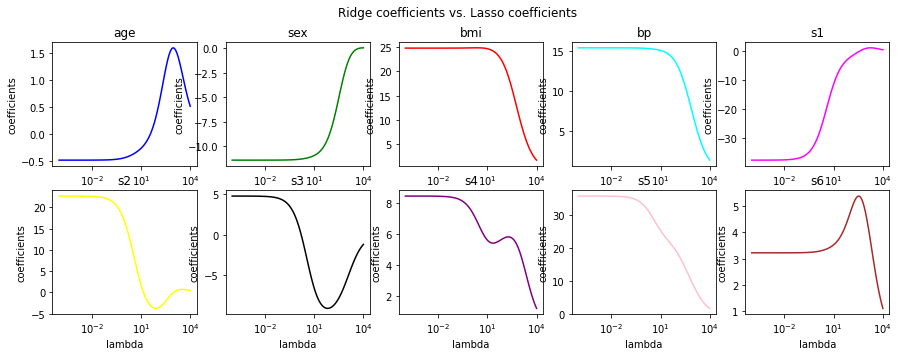

In [ ]:
# Plot the results
plt.figure(figsize=(15, 5))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'brown']
for i in range(len(diabetes.feature_names)):
    plt.subplot(2, 5, i+1)
    plt.plot(alphas, np.array(coefs_ridge)[:, i], color=colors[i])
    plt.title(diabetes.feature_names[i])
    plt.xlabel('lambda')
    plt.ylabel('coefficients')
    plt.xscale('log')
plt.suptitle('Ridge coefficients vs. Lasso coefficients')
plt.show()

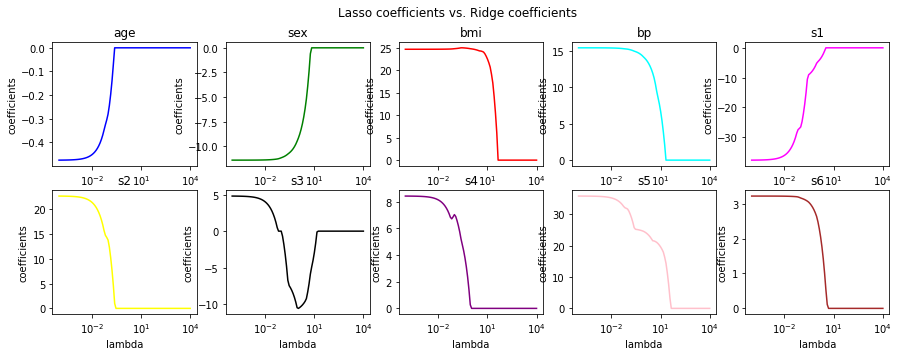

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(len(diabetes.feature_names)):
    plt.subplot(2, 5, i+1)
    plt.plot(alphas, np.array(coefs_lasso)[:, i], color=colors[i])
    plt.title(diabetes.feature_names[i])
    plt.xlabel('lambda')
    plt.ylabel('coefficients')
    plt.xscale('log')
plt.suptitle('Lasso coefficients vs. Ridge coefficients')
plt.show()

In [33]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Set up arrays to hold the coefficient values for each Lambda value
n_alphas = 5
alphas = np.logspace(-4, 1, n_alphas)
ridge_coefs = np.zeros((n_alphas, X.shape[1]))
lasso_coefs = np.zeros((n_alphas, X.shape[1]))

# Perform Ridge and Lasso regression for each Lambda value and save the coefficient values
for i, alpha in enumerate(alphas):
    # Ridge regression
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(X, y)
    ridge_coefs[i, :] = ridge.coef_

    # Lasso regression
    lasso = Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(X, y)
    lasso_coefs[i, :] = lasso.coef_

Text(0.5, 1.0, 'Ridge Regression((Lambda VS coefficient of params)')

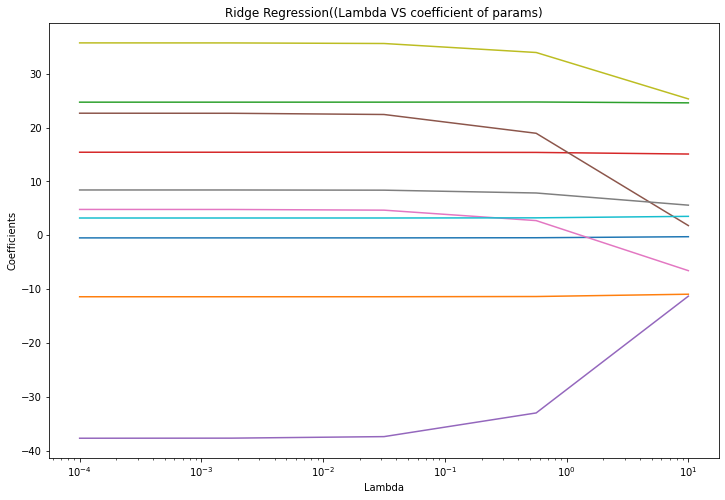

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::])
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Ridge Regression((Lambda VS coefficient of params)')

From the plots, we can make the following observations:

- As lambda increases, the magnitude of the coefficients decreases for both ridge and lasso regression. This is because higher values of lambda lead to more regularization, which in turn penalizes large coefficients.

- For ridge regression, the coefficients decrease gradually and approach zero as lambda increases, but never exactly become zero. This is because ridge regression only penalizes the magnitude of the coefficients, but does not force them to be exactly zero.

- Overall, ridge regression can be effective at reducing the impact of multicollinearity, while LASSO regression can perform feature selection and lead to simpler models. The choice between the two methods depends on the specific goals and characteristics of the data.

Text(0.5, 1.0, 'Lasso Regression((Lambda VS coefficient of params)')

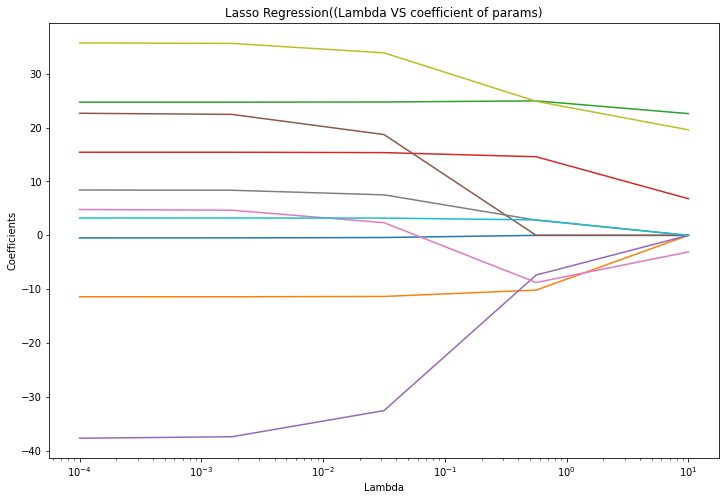

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::])
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Regression((Lambda VS coefficient of params)')

- For lasso regression, the coefficients become zero for some values of lambda. This is because lasso regression uses an L1 penalty, which tends to produce sparse solutions by forcing some of the coefficients to be exactly zero.
- The coefficients that become zero indicates that they are less important, while the non-zero coefficients correspond to the more important features. Thus it is also useful for feature selection.

Text(0.5, 1.0, 'Elastic Net Regression(Lambda VS coeffiecient of params)')

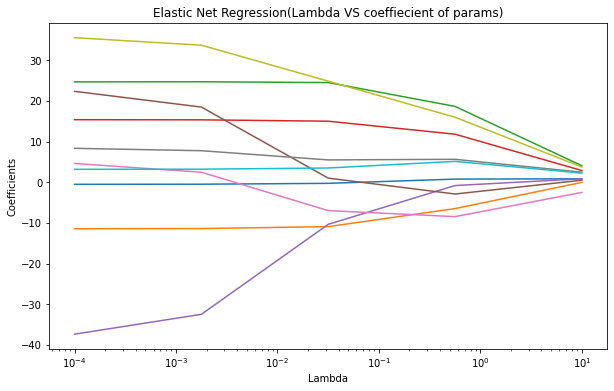

In [21]:
alphas = np.logspace(-4, 1, n_alphas)
coefs = []
for a in alphas:
    elastic_net = ElasticNet(alpha=a, l1_ratio=0.2)
    elastic_net.fit(X, y)
    coefs.append(elastic_net.coef_)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::])
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title("Elastic Net Regression(Lambda VS coeffiecient of params)")

Elastic net regression is a combination of lasso and ridge regression , we can adjust value of l1_ratio if it is less than 0.5 then it performs more like ridge regression else like lasso regression.

#Boston housing dataset 

In [35]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [36]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Set up arrays to hold the coefficient values for each Lambda value
n_alphas = 10
alphas = np.logspace(-5,2, n_alphas)
ridge_coefs = np.zeros((n_alphas, X.shape[1]))
lasso_coefs = np.zeros((n_alphas, X.shape[1]))

# Perform Ridge and Lasso regression for each Lambda value and save the coefficient values
for i, alpha in enumerate(alphas):
    # Ridge regression
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(X, y)
    ridge_coefs[i, :] = ridge.coef_

    # Lasso regression
    lasso = Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(X, y)
    lasso_coefs[i, :] = lasso.coef_

Ridge_coff = {}
Lasso_coff = {}
for i in range(n_alphas):
  Ridge_coff[alphas[i]] = ridge_coefs[i]
  Lasso_coff[alphas[i]] = lasso_coefs[i]


Text(0.5, 1.0, 'Ridge Regression((Lambda VS coefficient of params)')

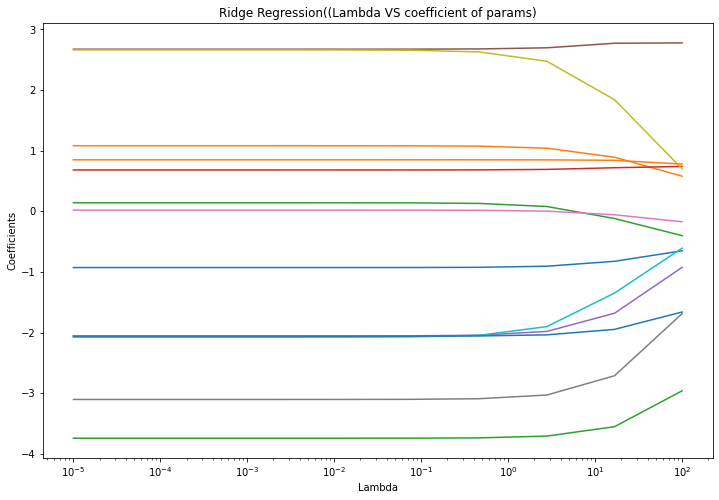

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::])
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Ridge Regression((Lambda VS coefficient of params)')

* As mentioned above ridge does not shrink the parameters to complete 0 and so it does not perform feature selection


Text(0.5, 1.0, 'Lasso Regression(Lambda VS coefficient of params)')

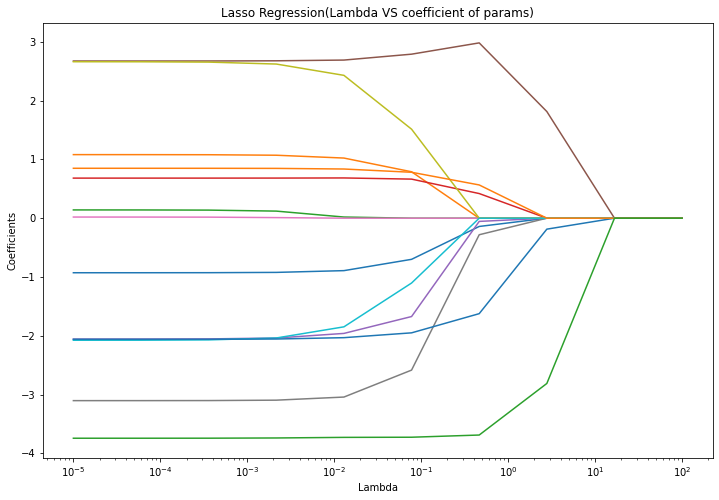

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::])
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Regression(Lambda VS coefficient of params)')

* By making the coefficient 0 for less important features , lasso performs selection of parameters

Text(0.5, 1.0, 'ElasticNet Regression(Lambda VS coefficient of params)')

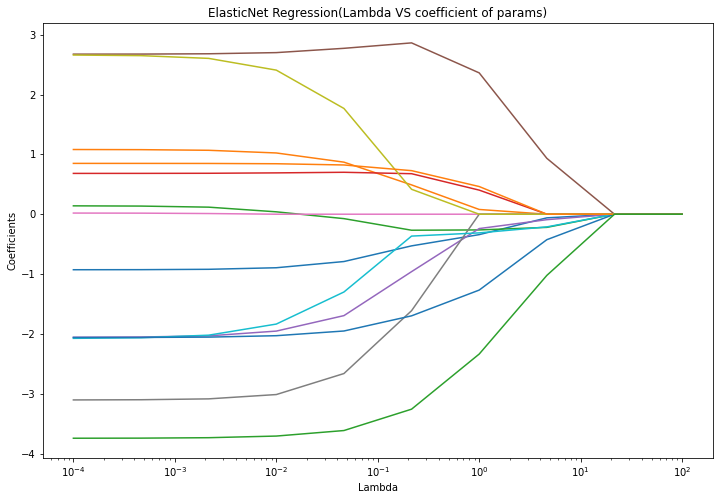

In [42]:
alphas = np.logspace(-4, 2, n_alphas)
coefs = []
for a in alphas:
    elastic_net = ElasticNet(alpha=a, l1_ratio=0.5)
    elastic_net.fit(X, y)
    coefs.append(elastic_net.coef_)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::])
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title("ElasticNet Regression(Lambda VS coefficient of params)")

#For showing the different l1 ratio effects following plot is shown :

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.991e+05, tolerance: 2.164e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.934e+05, tolerance: 2.164e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

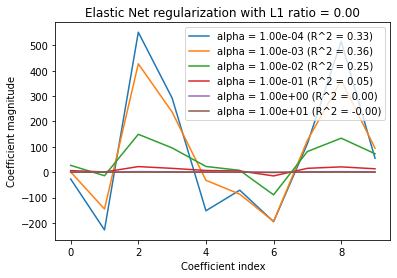

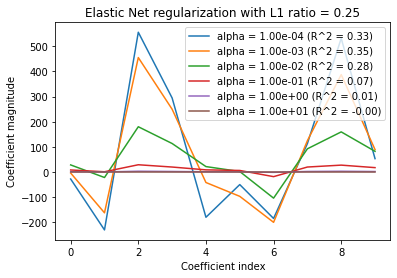

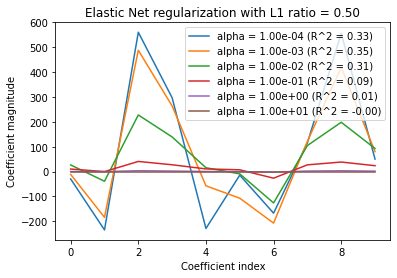

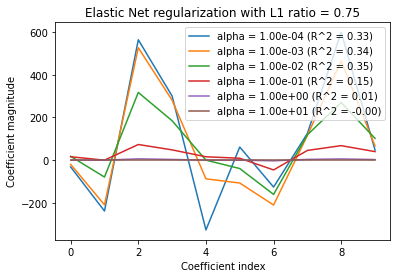

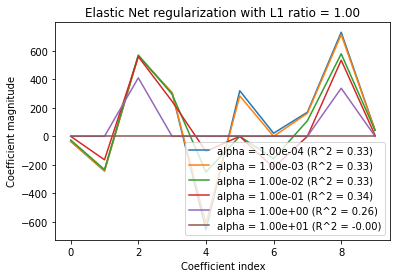

In [3]:
from sklearn import datasets
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

# Define the range of lambda 1 and lambda 2 values to try
l1_ratios = np.linspace(0, 1, num=5)
alphas = np.logspace(-4, 1, num=6)

# Initialize the model
enet = ElasticNet(max_iter=10000)

# Loop over the different combinations of lambda 1 and lambda 2 values
for l1_ratio in l1_ratios:
    plt.figure()
    plt.title(f"Elastic Net regularization with L1 ratio = {l1_ratio:.2f}")
    for alpha in alphas:
        # Set the values of lambda 1 and lambda 2
        enet.set_params(alpha=alpha, l1_ratio=l1_ratio)

        # Fit the model on the training data
        enet.fit(X_train, y_train)

        # Compute the test set R^2 score
        score = enet.score(X_test, y_test)

        # Plot the coefficients for this combination of lambda 1 and lambda 2
        plt.plot(enet.coef_, label=f"alpha = {alpha:.2e} (R^2 = {score:.2f})")

    plt.legend(loc="best")
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.axis("tight")
    plt.show()

The resulting plot shows the coefficients for each feature in the dataset, for each combination of lambda 1 and lambda 2 values. The x-axis represents the feature index, and the y-axis represents the magnitude of the coefficient. The different lines in the plot correspond to different values of lambda 1 and lambda 2, and the legend shows the corresponding R^2 score for each combination of lambda 1 and lambda 2.


- For **ElastiNet regression**, The regularization paths for Elastic Net Regression depend on both lambda and the value of the mixing parameter l1_ratio. As lambda increases, the coefficients tend to decrease towards zero, similar to Ridge Regression. However, the effect of l1_ratio determines how quickly the coefficients become zero and how many of them are set exactly to zero. When l1_ratio is close to 1, Elastic Net Regression behaves more like Lasso Regression and performs feature selection. When l1_ratio is close to 0, Elastic Net Regression behaves more like Ridge Regression and shrinks the coefficients towards zero without eliminating any of them.